In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
# Load the dataset
data = pd.read_csv("./creditcard.csv")

# Display the first few rows of the dataset
print(data.head())

# Check the shape of the dataset
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

# Check the distribution of the target variable
print(data["Class"].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

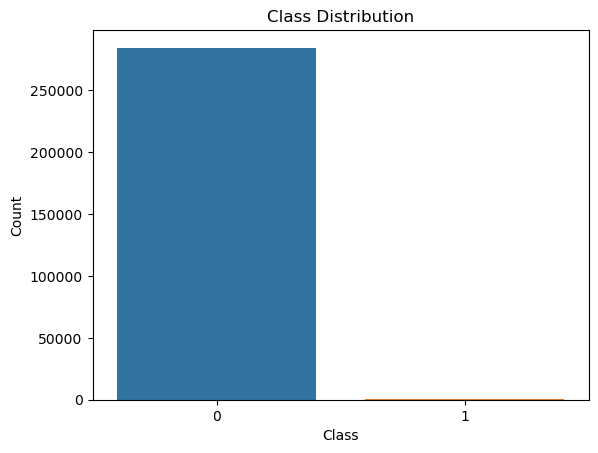

In [98]:
# Plot the class distribution
sns.countplot(x="Class", data=data)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


## Problems of imbalanced dataset: If we use this dataset as the foundation for our predictive models and analysis, we may encounter significant errors. Our models are likely to overfit, as they will falsely assume that the majority of transactions are 'Not fraud'.

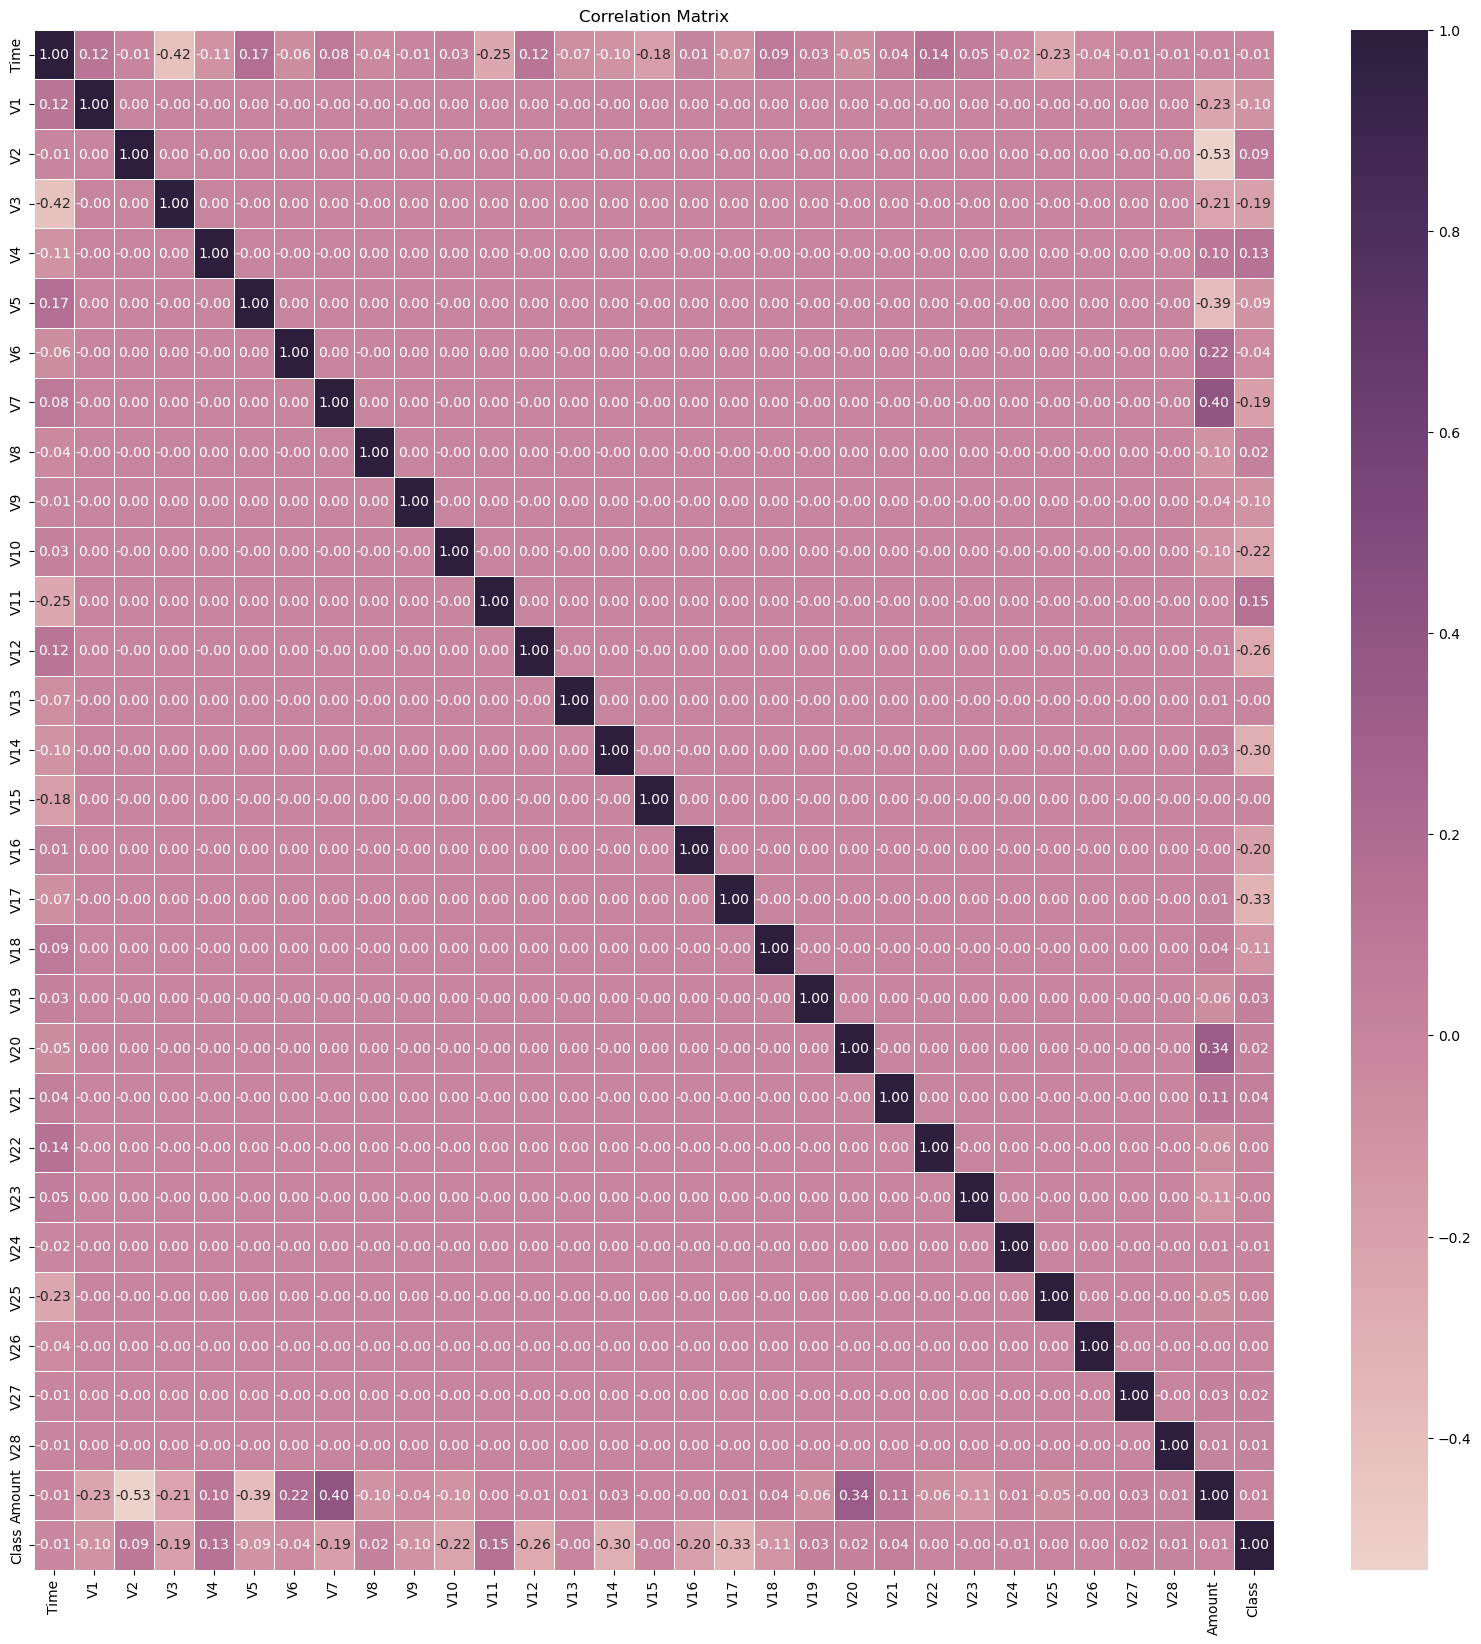

In [99]:
# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(),cmap=sns.cubehelix_palette(as_cmap=True), linewidths=.5,annot=True, fmt='.2f' )
plt.title("Correlation Matrix")
plt.show()


In [100]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

In [101]:
# Split the dataset into features and target variable
X = data.drop("Class", axis=1)
y = data["Class"]


In [102]:
def test_multiple_models(X, y, cv):
    # Let's split our dataset and see what it looks like:
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25)
    training_fraud = sum(y_train.values)
    training_fraud_pct = sum(y_train.values)/len(y_train.values)*100
    test_fraud = sum(y_test.values)
    test_fraud_pct = sum(y_test.values)/len(y_test.values)*100
    print(f"X train: {X_train.shape}\n")
    print(f"y train: {y_train.shape}\n")
    print(f"X Test: {X_test.shape}\n")
    print(f"y test: {y_test.shape}")
    print(f"Fraud in traning data: {training_fraud} which is {round(training_fraud_pct*100, 3)}%")
    print(f"Fraud in test data: {test_fraud} which is {round(test_fraud_pct*100, 3)}%")
    print("-----------------------------------------");
    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Define the models to test
    models = [
        ("xgb",xgb.XGBClassifier(random_state=42)),
        # ("AdaBoost",AdaBoostClassifier(n_estimators=100, random_state=42))

    ]

    # Iterate over each model
    for name, model in models:
        # Perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=cv)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model: {name}")
        print("Cross-Validation Accuracy:", scores.mean())
        print("Accuracy:", accuracy)

        report = classification_report(y_test, y_pred)
        print("Classification Report:\n", report)
        print("-----------------------------------------");

In [103]:
test_multiple_models(X=X,y=y,cv=5)

X train: (213605, 30)

y train: (213605,)

X Test: (71202, 30)

y test: (71202,)
Fraud in traning data: 369 which is 17.275%
Fraud in test data: 123 which is 17.275%
-----------------------------------------
Model: xgb
Cross-Validation Accuracy: 0.999527164626296
Accuracy: 0.9996067526193084
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.81      0.88       123

    accuracy                           1.00     71202
   macro avg       0.98      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202

-----------------------------------------
